In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [2]:
if os.path.isfile('C:\\Users\\DIVYANSH SHARMA\\Desktop\\SavedFolder\\final.sqlite'):
    conn = sqlite3.connect('C:\\Users\\DIVYANSH SHARMA\\Desktop\\SavedFolder\\final.sqlite')
    final = pd.read_sql_query(""" SELECT * FROM Reviews WHERE Score != 3 """, conn)
    conn.close()
else:
    print("next")
    
final.shape
final=final[0:200000]
final=final.sort_values(by=['Time'])
final.shape


(200000, 12)

In [3]:
#BoW
count_vect = CountVectorizer() #in scikit-learn
final_counts = count_vect.fit_transform(final['CleanedText'].values)
print("the type of count vectorizer ",type(final_counts))
print("the shape of out text BOW vectorizer ",final_counts.get_shape())
print("the number of unique words ", final_counts.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (200000, 52707)
the number of unique words  52707


In [4]:
final_counts

<200000x52707 sparse matrix of type '<class 'numpy.int64'>'
	with 6104211 stored elements in Compressed Sparse Row format>

In [5]:
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
from sklearn.metrics import f1_score
clf=BernoulliNB()

D:\installed_files\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:

y=final['Score']

In [7]:
X_1, X_test, y_1, y_test = cross_validation.train_test_split(final_counts, y, test_size=0.3, random_state=0)
X_tr, X_cv, y_tr, y_cv = cross_validation.train_test_split(X_1, y_1, test_size=0.3)

In [18]:
X_cv

<42000x52707 sparse matrix of type '<class 'numpy.int64'>'
	with 1277978 stored elements in Compressed Sparse Row format>

D:\installed_files\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


----------------
false positive rate is
0.06538095238095239
----------------
false positive rate is
0.0729047619047619
----------------
false positive rate is
0.0950952380952381
----------------
false positive rate is
0.11104761904761905
----------------
false positive rate is
0.12242857142857143
----------------
false positive rate is
0.12995238095238096
----------------
false positive rate is
0.1352142857142857
----------------
false positive rate is
0.13845238095238097
----------------
false positive rate is
0.14054761904761906
----------------
false positive rate is
0.1422142857142857
----------------
false positive rate is
0.14307142857142857
----------------
false positive rate is
0.14397619047619048
----------------
false positive rate is
0.14476190476190476
----------------
false positive rate is
0.1454047619047619
----------------
false positive rate is
0.14583333333333334
----------------
false positive rate is
0.14647619047619048
----------------
false positive rate is
0.146

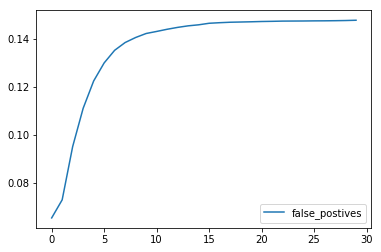

In [19]:


myList = list(range(0,30))
neighbors = myList

fp_scores = [0]*30
f_scores = [0]*30
precision_list = [0]*30
recall_list = [0]*30

for k in neighbors:
    
    bnb = BernoulliNB(alpha=k)
    bnb.fit(X_tr,y_tr)
    y_pred=bnb.predict(X_cv)
    tn, fp, fn, tp = confusion_matrix(y_cv, y_pred).ravel()
    count=0
    for t in y_cv:
        if(t==1):
            ++count
    # count denotes total positive labels
    score=f1_score(y_cv, y_pred, average='macro')
    precision = tp/tp+fp
    recall = tp/tp+fn
    f_scores[k]=score
    fp_scores[k]=fp/(len(y_cv)-count)
    precision_list[k]=precision
    recall_list[k]=recall
    
    #print(confusion_matrix(y_cv, y_pred).ravel())
    print("----------------")
    
    print("false positive rate is")
    print(fp/(len(y_cv)-count))

optimal_a = fp_scores.index(min(fp_scores))
print('\nThe optimal value of a is %d.' % optimal_a)

plt.plot(range(0,30),fp_scores,label='false_postives')
#plt.plot(range(0,30),f_scores,label='f_scores')
#plt.plot(range(0,30),precision_list,label='precision')
#plt.plot(range(0,30),recall_list,label='recall')
plt.legend()



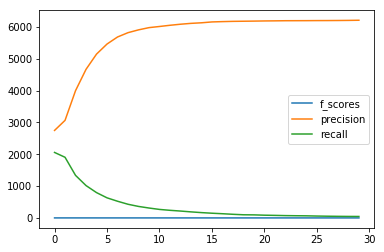

In [29]:
plt.plot(range(0,30),f_scores,label='f_scores')
plt.plot(range(0,30),precision_list,label='precision')
plt.plot(range(0,30),recall_list,label='recall')
plt.legend()

D:\installed_files\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


[[ 3481  2746]
 [ 2055 33718]]


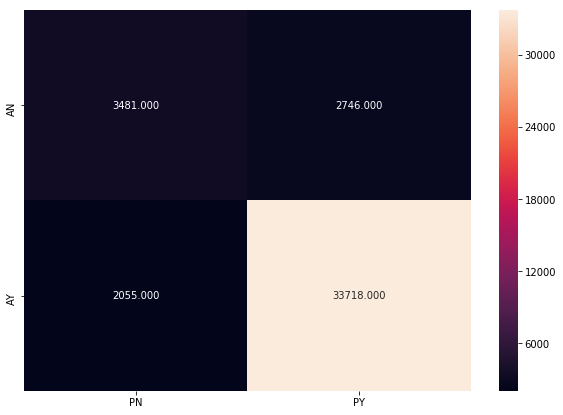

In [27]:
# for a=0
bnb = BernoulliNB(alpha=0)
bnb.fit(X_tr,y_tr)
y_pred=bnb.predict(X_cv)
print(confusion_matrix(y_cv, y_pred))
mane=confusion_matrix(y_cv, y_pred)
df_cm = pd.DataFrame(mane, index = ["AN","AY"],
                  columns = ["PN","PY"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,fmt=".3f")

D:\installed_files\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


[[ 5201  3758]
 [ 3002 48039]]


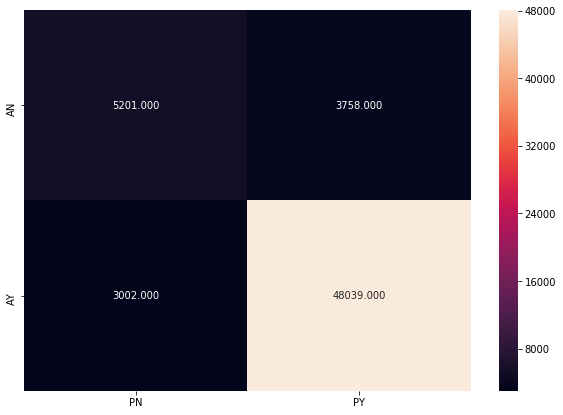

In [30]:
# for a=0, on original data
bnb = BernoulliNB(alpha=0)
bnb.fit(X_1,y_1)
y_pred=bnb.predict(X_test)
print(confusion_matrix(y_test, y_pred))
mane=confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(mane, index = ["AN","AY"],
                  columns = ["PN","PY"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,fmt=".3f")

In [82]:
def important_features(vectorizer,classifier,n=20):
    class_labels = classifier.classes_
    feature_names =vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.feature_count_[0], feature_names),reverse=True)[:n]
    topn_class2 = sorted(zip(classifier.feature_count_[1], feature_names),reverse=True)[:n] 
    print("Important words in negative reviews")
    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)
    print("-----------------------------------------")
    print("Important words in positive reviews")
    for coef, feat in topn_class2:
        
        print(class_labels[1], coef, feat)

In [83]:
important_features(count_vect,bnb,n=20)

Important words in negative reviews
0 7282.0 tast
0 7207.0 like
0 6454.0 product
0 5278.0 one
0 4823.0 would
0 4509.0 tri
0 4288.0 good
0 4228.0 buy
0 3935.0 use
0 3934.0 flavor
0 3859.0 get
0 3622.0 dont
0 3455.0 order
0 3260.0 even
0 2908.0 make
0 2899.0 time
0 2822.0 much
0 2769.0 amazon
0 2714.0 bought
0 2680.0 eat
-----------------------------------------
Important words in positive reviews
1 34147.0 like
1 33563.0 tast
1 32806.0 love
1 32573.0 good
1 32412.0 great
1 27753.0 use
1 26375.0 flavor
1 26305.0 one
1 25180.0 product
1 24409.0 tri
1 22870.0 make
1 21318.0 get
1 18161.0 time
1 17566.0 buy
1 17129.0 amazon
1 17045.0 best
1 16758.0 find
1 15629.0 price
1 15553.0 would
1 15255.0 also


In [197]:
final['summ_len']=final['Summary'].apply(lambda x:len(x))

In [198]:
final['text_len']=final['CleanedText'].apply(lambda x:len(x))

In [199]:
final['sent_ratio']=final['summ_len']/final['text_len']
final['sent_ratio']=final['sent_ratio'].round(decimals=2)


In [200]:
from scipy.sparse import hstack
sammy = hstack((final_counts,np.array(final['summ_len'])[:,None]))


sammy = hstack((sammy,np.array(final['text_len'])[:,None]))
#sammy = hstack((sammy,np.array(final['sent_ratio'])[:,None]))
sammy = hstack((sammy,np.array(final['HelpfulnessNumerator'])[:,None]))
sammy = hstack((sammy,np.array(final['HelpfulnessDenominator'])[:,None]))


In [202]:
X_1, X_test, y_1, y_test = cross_validation.train_test_split(sammy, y, test_size=0.3, random_state=0)
X_tr, X_cv, y_tr, y_cv = cross_validation.train_test_split(X_1, y_1, test_size=0.3)

D:\installed_files\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
D:\installed_files\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


----------------
false positive rate is
0.15083333333333335
----------------
false positive rate is
0.07409523809523809
----------------
false positive rate is
0.09671428571428571
----------------
false positive rate is
0.11352380952380953
----------------
false positive rate is
0.12442857142857143
----------------
false positive rate is
0.13154761904761905
----------------
false positive rate is
0.1371904761904762
----------------
false positive rate is
0.14114285714285715
----------------
false positive rate is
0.14314285714285716
----------------
false positive rate is
0.1448095238095238
----------------
false positive rate is
0.14607142857142857
----------------
false positive rate is
0.14676190476190476
----------------
false positive rate is
0.1473809523809524
----------------
false positive rate is
0.14792857142857144
----------------
false positive rate is
0.14845238095238095
----------------
false positive rate is
0.149
----------------
false positive rate is
0.149190476190476

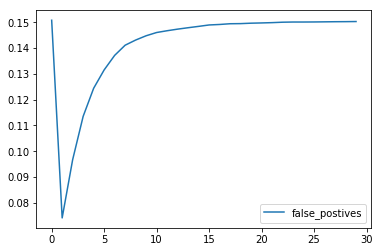

In [203]:


myList = list(range(0,30))
neighbors = myList

fp_scores = [0]*30
f_scores = [0]*30
precision_list = [0]*30
recall_list = [0]*30

for k in neighbors:
    
    bnb = BernoulliNB(alpha=k)
    bnb.fit(X_tr,y_tr)
    y_pred=bnb.predict(X_cv)
    tn, fp, fn, tp = confusion_matrix(y_cv, y_pred).ravel()
    count=0
    for t in y_cv:
        if(t==1):
            ++count
    # count denotes total positive labels
    score=f1_score(y_cv, y_pred, average='macro')
    precision = tp/tp+fp
    recall = tp/tp+fn
    f_scores[k]=score
    fp_scores[k]=fp/(len(y_cv)-count)
    precision_list[k]=precision
    recall_list[k]=recall
    
    #print(confusion_matrix(y_cv, y_pred).ravel())
    print("----------------")
    
    print("false positive rate is")
    print(fp/(len(y_cv)-count))

optimal_a = fp_scores.index(min(fp_scores))
print('\nThe optimal value of a is %d.' % optimal_a)

plt.plot(range(0,30),fp_scores,label='false_postives')
#plt.plot(range(0,30),f_scores,label='f_scores')
#plt.plot(range(0,30),precision_list,label='precision')
#plt.plot(range(0,30),recall_list,label='recall')
plt.legend()



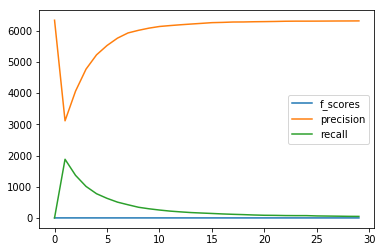

In [204]:
plt.plot(range(0,30),f_scores,label='f_scores')
plt.plot(range(0,30),precision_list,label='precision')
plt.plot(range(0,30),recall_list,label='recall')
plt.legend()

[[ 3223  3112]
 [ 1879 33786]]


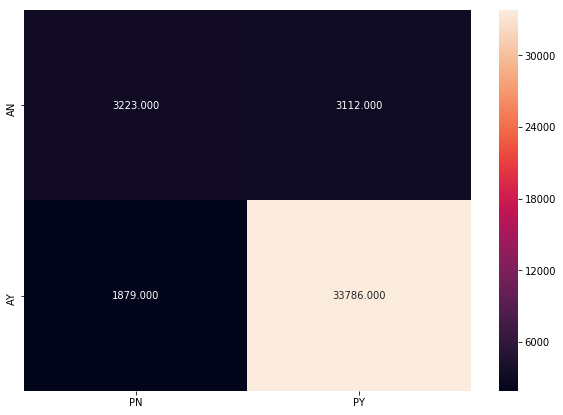

In [205]:

bnb = BernoulliNB(alpha=1)
bnb.fit(X_tr,y_tr)
y_pred=bnb.predict(X_cv)
print(confusion_matrix(y_cv, y_pred))
mane=confusion_matrix(y_cv, y_pred)
df_cm = pd.DataFrame(mane, index = ["AN","AY"],
                  columns = ["PN","PY"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,fmt=".3f")

In [206]:
def important_features(vectorizer,classifier,n=20):
    class_labels = classifier.classes_
    feature_names =vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.feature_count_[0], feature_names),reverse=True)[:n]
    topn_class2 = sorted(zip(classifier.feature_count_[1], feature_names),reverse=True)[:n] 
    print("Important words in negative reviews")
    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)
    print("-----------------------------------------")
    print("Important words in positive reviews")
    for coef, feat in topn_class2:
        
        print(class_labels[1], coef, feat)

In [207]:
important_features(count_vect,bnb,n=20)

Important words in negative reviews
0 5066.0 tast
0 4969.0 like
0 4528.0 product
0 3648.0 one
0 3325.0 would
0 3133.0 tri
0 2991.0 good
0 2991.0 buy
0 2774.0 use
0 2713.0 flavor
0 2678.0 get
0 2500.0 dont
0 2415.0 order
0 2251.0 even
0 2042.0 make
0 2022.0 time
0 1979.0 much
0 1961.0 amazon
0 1853.0 bought
0 1843.0 look
-----------------------------------------
Important words in positive reviews
1 23878.0 like
1 23517.0 tast
1 22932.0 love
1 22728.0 good
1 22719.0 great
1 19435.0 use
1 18426.0 one
1 18343.0 flavor
1 17777.0 product
1 17062.0 tri
1 16040.0 make
1 14976.0 get
1 12608.0 time
1 12370.0 buy
1 12012.0 amazon
1 11951.0 best
1 11706.0 find
1 10941.0 would
1 10914.0 price
1 10640.0 also


In [223]:
####
## using TF-IDF
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
final_tf_idf = tf_idf_vect.fit_transform(final['CleanedText'].values)


In [224]:
final_tf_idf

<200000x1946629 sparse matrix of type '<class 'numpy.float64'>'
	with 13141673 stored elements in Compressed Sparse Row format>

In [225]:
sammy = hstack((final_tf_idf,np.array(final['summ_len'])[:,None]))


sammy = hstack((sammy,np.array(final['text_len'])[:,None]))
#sammy = hstack((sammy,np.array(final['sent_ratio'])[:,None]))
sammy = hstack((sammy,np.array(final['HelpfulnessNumerator'])[:,None]))
sammy = hstack((sammy,np.array(final['HelpfulnessDenominator'])[:,None]))


In [226]:
sammy

<200000x1946633 sparse matrix of type '<class 'numpy.float64'>'
	with 13759629 stored elements in COOrdinate format>

In [227]:
X_1, X_test, y_1, y_test = cross_validation.train_test_split(sammy, y, test_size=0.3, random_state=0)
X_tr, X_cv, y_tr, y_cv = cross_validation.train_test_split(X_1, y_1, test_size=0.3)

D:\installed_files\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


----------------
false positive rate is
0.1144047619047619
----------------
false positive rate is
0.15047619047619049


D:\installed_files\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


----------------
false positive rate is
0.15054761904761904


D:\installed_files\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


----------------
false positive rate is
0.15054761904761904


D:\installed_files\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


----------------
false positive rate is
0.15054761904761904


D:\installed_files\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


----------------
false positive rate is
0.15054761904761904


D:\installed_files\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


----------------
false positive rate is
0.15054761904761904


D:\installed_files\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


----------------
false positive rate is
0.15054761904761904


D:\installed_files\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


----------------
false positive rate is
0.15054761904761904


D:\installed_files\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


----------------
false positive rate is
0.15054761904761904


D:\installed_files\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


----------------
false positive rate is
0.15054761904761904


D:\installed_files\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


----------------
false positive rate is
0.15054761904761904


D:\installed_files\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


----------------
false positive rate is
0.15054761904761904


D:\installed_files\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


----------------
false positive rate is
0.15054761904761904


D:\installed_files\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


----------------
false positive rate is
0.15054761904761904


D:\installed_files\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


----------------
false positive rate is
0.15054761904761904


D:\installed_files\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


----------------
false positive rate is
0.15054761904761904


D:\installed_files\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


----------------
false positive rate is
0.15054761904761904


D:\installed_files\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


----------------
false positive rate is
0.15054761904761904


D:\installed_files\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


----------------
false positive rate is
0.15054761904761904


D:\installed_files\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


----------------
false positive rate is
0.15054761904761904


D:\installed_files\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


----------------
false positive rate is
0.15054761904761904


D:\installed_files\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


----------------
false positive rate is
0.15054761904761904


D:\installed_files\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


----------------
false positive rate is
0.15054761904761904


D:\installed_files\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


----------------
false positive rate is
0.15054761904761904


D:\installed_files\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


----------------
false positive rate is
0.15054761904761904


D:\installed_files\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


----------------
false positive rate is
0.15054761904761904


D:\installed_files\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


----------------
false positive rate is
0.15054761904761904


D:\installed_files\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


----------------
false positive rate is
0.15054761904761904


D:\installed_files\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


----------------
false positive rate is
0.15054761904761904

The optimal value of a is 0.


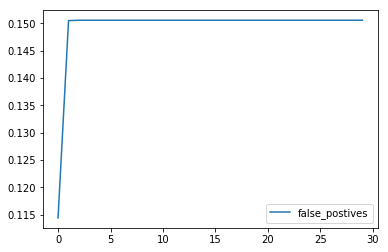

In [228]:
from sklearn.naive_bayes import MultinomialNB

myList = list(range(0,30))
neighbors = myList

fp_scores = [0]*30
f_scores = [0]*30
precision_list = [0]*30
recall_list = [0]*30

for k in neighbors:
    
    bnb = MultinomialNB(alpha=k)
    bnb.fit(X_tr,y_tr)
    y_pred=bnb.predict(X_cv)
    tn, fp, fn, tp = confusion_matrix(y_cv, y_pred).ravel()
    count=0
    for t in y_cv:
        if(t==1):
            ++count
    # count denotes total positive labels
    score=f1_score(y_cv, y_pred, average='macro')
    precision = tp/tp+fp
    recall = tp/tp+fn
    f_scores[k]=score
    fp_scores[k]=fp/(len(y_cv)-count)
    precision_list[k]=precision
    recall_list[k]=recall
    
    #print(confusion_matrix(y_cv, y_pred).ravel())
    print("----------------")
    
    print("false positive rate is")
    print(fp/(len(y_cv)-count))

optimal_a = fp_scores.index(min(fp_scores))
print('\nThe optimal value of a is %d.' % optimal_a)

plt.plot(range(0,30),fp_scores,label='false_postives')
#plt.plot(range(0,30),f_scores,label='f_scores')
#plt.plot(range(0,30),precision_list,label='precision')
#plt.plot(range(0,30),recall_list,label='recall')
plt.legend()



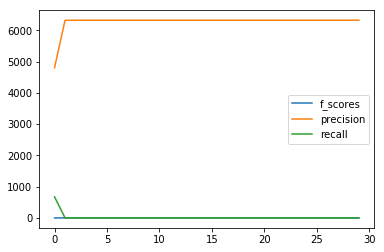

In [229]:
plt.plot(range(0,30),f_scores,label='f_scores')
plt.plot(range(0,30),precision_list,label='precision')
plt.plot(range(0,30),recall_list,label='recall')
plt.legend()

D:\installed_files\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


[[ 1518  4805]
 [  672 35005]]


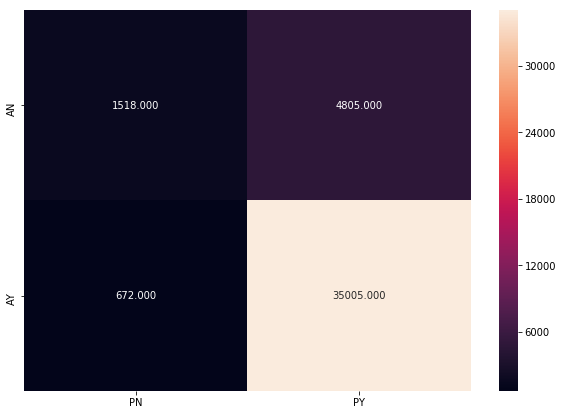

In [232]:
# for a=0
bnb = MultinomialNB(alpha=0)
bnb.fit(X_tr,y_tr)
y_pred=bnb.predict(X_cv)
print(confusion_matrix(y_cv, y_pred))
mane=confusion_matrix(y_cv, y_pred)
df_cm = pd.DataFrame(mane, index = ["AN","AY"],
                  columns = ["PN","PY"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,fmt=".3f")

In [231]:
important_features(tf_idf_vect,bnb,n=20)

Important words in negative reviews
0 258.68547693113067 tast
0 241.885159572019 product
0 223.22179762894652 like
0 164.64519287738153 would
0 160.53690895237395 one
0 146.2900147224849 tea
0 145.37728874265497 flavor
0 145.30532668286614 order
0 144.13286981294218 buy
0 139.10857843464933 tri
0 127.60180853797587 box
0 121.59126258270736 dont
0 121.22963692073121 disappoint
0 119.22822800164309 good
0 116.86243167741583 bag
0 116.46533870973879 use
0 116.41013726329085 get
0 113.73780106780131 food
0 112.62138291524406 coffe
0 104.28420244587721 purchas
-----------------------------------------
Important words in positive reviews
1 1242.4495145940414 tea
1 1180.8247762852604 great
1 1153.3980932263416 love
1 1098.8603275678079 good
1 1071.917630802382 tast
1 1045.2570232598537 like
1 962.812957157238 flavor
1 960.3276690927127 use
1 934.5957247981327 product
1 819.7795708047796 coffe
1 818.9109590571638 one
1 771.9367545651795 tri
1 752.7682325797813 make
1 685.5616675139044 get
1 66

In [ ]:

"""
Result
After reading the documentation carefully, I concluded that
Bernoulli Naive Bayes should be used for bag of words
Multinomial for Tf-Idf

Though I calculated all the accuracy measures but mainly took false positive rate as the deciding factor

I added features like length of summary, length of text ,etc as a part of feature engineering
I tried to add ratio of len(summary)/len(text) as one of the feature which I thought ".... is the most important...." but
when I concatenate it with sparse matrix and pass it into the classifier, it is throwing some error...
..... I will raise this doubt on mail.....:)
 
less False positive rate is observed in case of BOW representation


"""
